In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,precision_score,f1_score, recall_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer


import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns', 26)

ImportError: cannot import name '_fit_context' from 'sklearn.base' (C:\Users\P.SANJAY KUMAR\.conda\envs\tp\lib\site-packages\sklearn\base.py)

In [2]:
df = pd.read_csv('./kidney_disease.csv')
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


KeyError: "['id'] not found in axis"

In [4]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [5]:
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [6]:
df.sample(10)

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
193,32.0,90.0,1.025,1.0,0.0,abnormal,abnormal,notpresent,notpresent,NaN,223.0,18.1,113.0,6.5,5.5,15,2600,2.8,yes,yes,no,poor,yes,yes,ckd
59,59.0,100.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,NaN,96.0,6.4,NaN,NaN,6.6,NaN,NaN,NaN,yes,yes,no,good,no,yes,ckd
174,54.0,70.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,111.0,146.0,7.5,141.0,4.7,11.0,35,8600,4.6,no,no,no,good,no,no,ckd
166,27.0,60.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,76.0,44.0,3.9,127.0,4.3,NaN,NaN,NaN,NaN,no,no,no,poor,yes,yes,ckd
89,50.0,70.0,1.020,0.0,0.0,NaN,normal,notpresent,notpresent,109.0,32.0,1.4,139.0,4.7,NaN,NaN,NaN,NaN,no,no,no,poor,no,no,ckd
35,65.0,90.0,1.020,2.0,1.0,abnormal,normal,notpresent,notpresent,270.0,39.0,2.0,NaN,NaN,12.0,36,9800,4.9,yes,yes,no,poor,no,yes,ckd
26,75.0,80.0,1.015,0.0,0.0,NaN,normal,notpresent,notpresent,156.0,45.0,2.4,140.0,3.4,11.6,35,10300,4,yes,yes,no,poor,no,no,ckd
153,55.0,90.0,1.010,2.0,1.0,abnormal,abnormal,notpresent,notpresent,273.0,235.0,14.2,132.0,3.4,8.3,22,14600,2.9,yes,yes,no,poor,yes,yes,ckd
139,41.0,70.0,1.015,2.0,0.0,NaN,abnormal,notpresent,present,NaN,68.0,2.8,132.0,4.1,11.1,33,NaN,NaN,yes,no,no,good,yes,yes,ckd
140,69.0,70.0,1.010,0.0,4.0,NaN,normal,notpresent,notpresent,256.0,40.0,1.2,142.0,5.6,NaN,NaN,NaN,NaN,no,no,no,good,no,no,ckd


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,391.0,51.483376,17.169714,2.000,42.00,55.00,64.50,90.000
blood_pressure,388.0,76.469072,13.683637,50.000,70.00,80.00,80.00,180.000
specific_gravity,353.0,1.017408,0.005717,1.005,1.01,1.02,1.02,1.025
albumin,354.0,1.016949,1.352679,0.000,0.00,0.00,2.00,5.000
sugar,351.0,0.450142,1.099191,0.000,0.00,0.00,0.00,5.000
blood_glucose_random,356.0,148.036517,79.281714,22.000,99.00,121.00,163.00,490.000
blood_urea,381.0,57.425722,50.503006,1.500,27.00,42.00,66.00,391.000
serum_creatinine,383.0,3.072454,5.741126,0.400,0.90,1.30,2.80,76.000
sodium,313.0,137.528754,10.408752,4.500,135.00,138.00,142.00,163.000
potassium,312.0,4.627244,3.193904,2.500,3.80,4.40,4.90,47.000


In [9]:
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

In [10]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']

In [11]:
cat_cols

['red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'peda_edema',
 'aanemia',
 'class']

In [12]:
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [13]:
num_cols

['age',
 'blood_pressure',
 'specific_gravity',
 'albumin',
 'sugar',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count']

In [14]:
for col in cat_cols:
    print(f'{col} {df[col].unique()}')

red_blood_cells [nan 'normal' 'abnormal']
pus_cell ['normal' 'abnormal' nan]
pus_cell_clumps ['notpresent' 'present' nan]
bacteria ['notpresent' 'present' nan]
hypertension ['yes' 'no' nan]
diabetes_mellitus ['yes' 'no' ' yes' nan]
coronary_artery_disease ['no' 'yes' nan]
appetite ['good' 'poor' nan]
peda_edema ['no' 'yes' nan]
aanemia ['no' 'yes' nan]
class ['ckd' 'notckd']


- diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values
- coronary_artery_disease has ['no' 'yes' '\tno' nan] values
- class has ['ckd' 'ckd\t' 'notckd'] 

values  must be corrected

In [15]:
df['diabetes_mellitus'].replace({'\tno':'no', '\tyes':'yes', ' yes':'yes'}, inplace=True)
df['coronary_artery_disease'] = df['coronary_artery_disease'].str.replace('\tno', 'no')
df['class'].replace({'ckd\t': 'ckd', 'notckd': 'not ckd'}, inplace=True)

In [16]:
df['class'] = df['class'].map({'ckd': 0, 'not ckd': 1})
df['class'] = pd.to_numeric(df['class'], errors='coerce')

In [17]:
cols = ['diabetes_mellitus','coronary_artery_disease','class']

for col in cols:
    print(f'{col} {df[col].unique()}')

diabetes_mellitus ['yes' 'no' nan]
coronary_artery_disease ['no' 'yes' nan]
class [0 1]


### EDA ###

In [18]:
value_counts = df['class'].value_counts()
categories = value_counts.index
counts = value_counts.values 

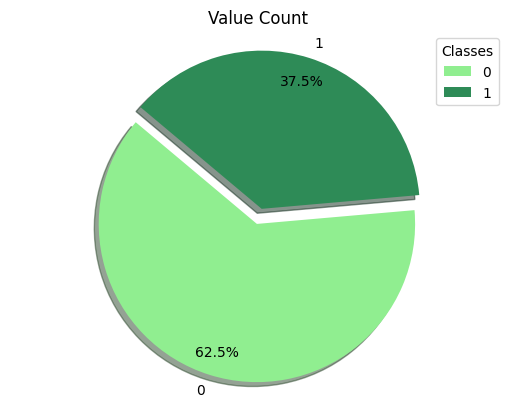

In [19]:
colors = ['lightgreen', 'seagreen', 'forestgreen']
explode = [0.05] * len(counts)

plt.pie(counts, explode=explode, shadow=True, labels=categories, autopct='%1.1f%%', startangle=140, pctdistance=0.85, colors=colors)
plt.axis('equal')
plt.title('Value Count')
plt.legend(categories, title='Classes', loc='best')
plt.show()


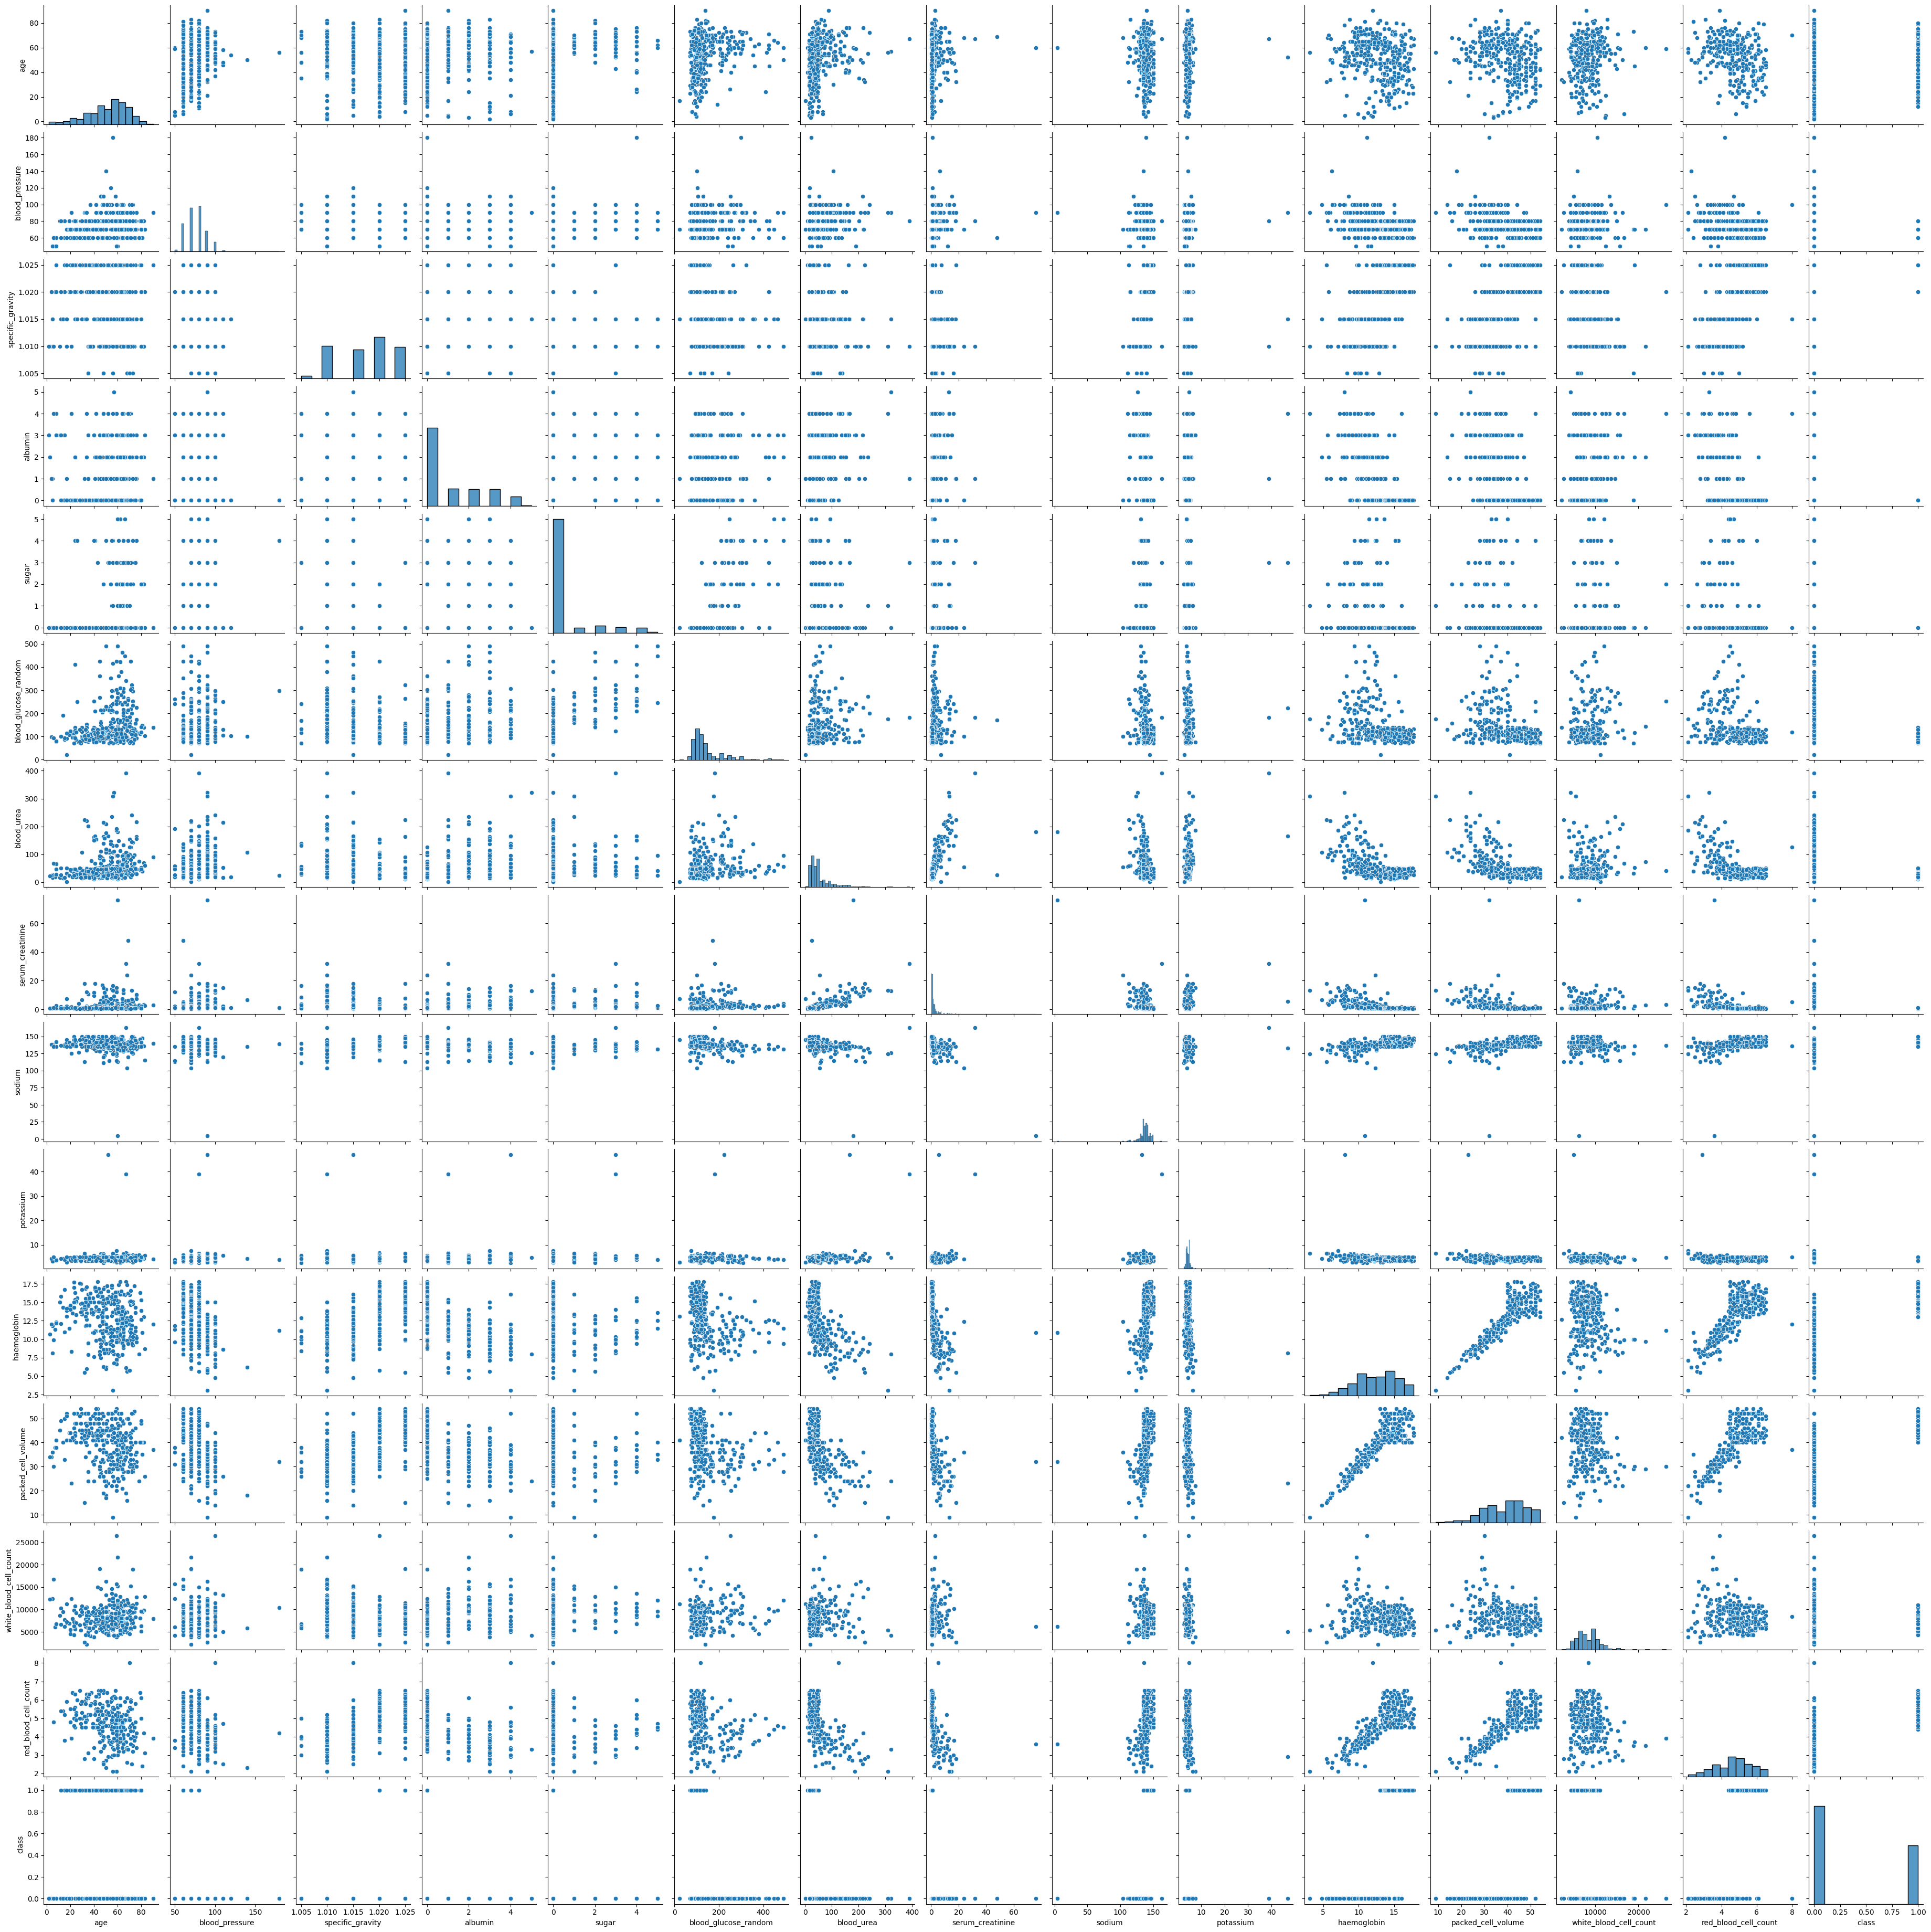

In [20]:
sns.pairplot(df);

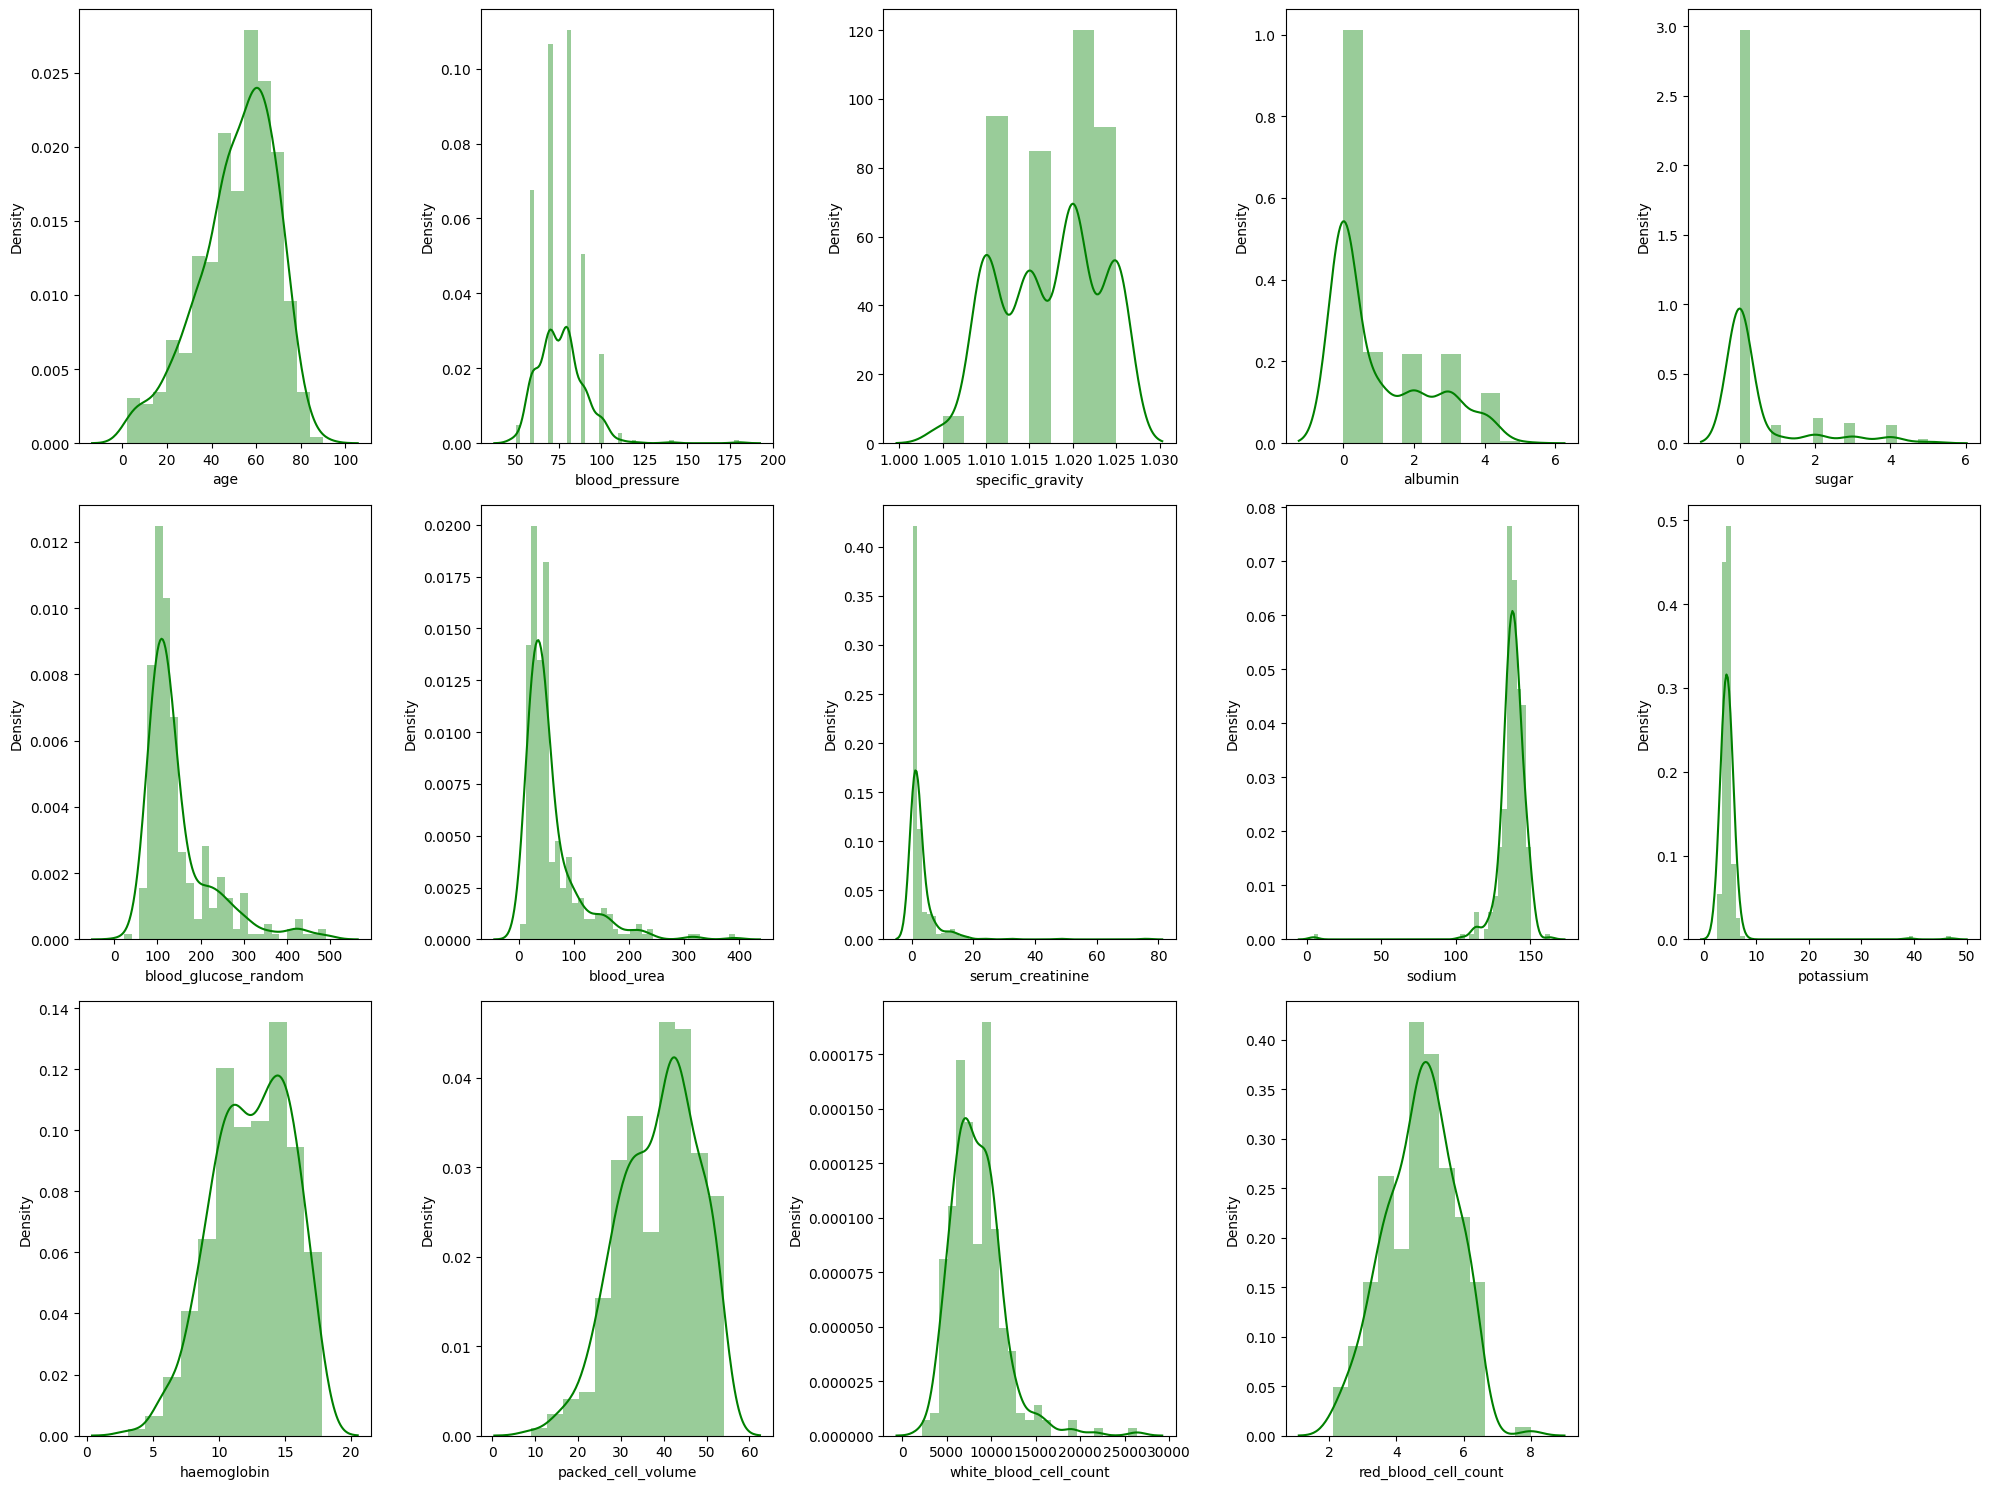

In [21]:
plt.figure(figsize=(20, 15))
for i, column in enumerate(num_cols, 1):
    plt.subplot(3, 5, i)
    sns.distplot(df[column], color='green')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

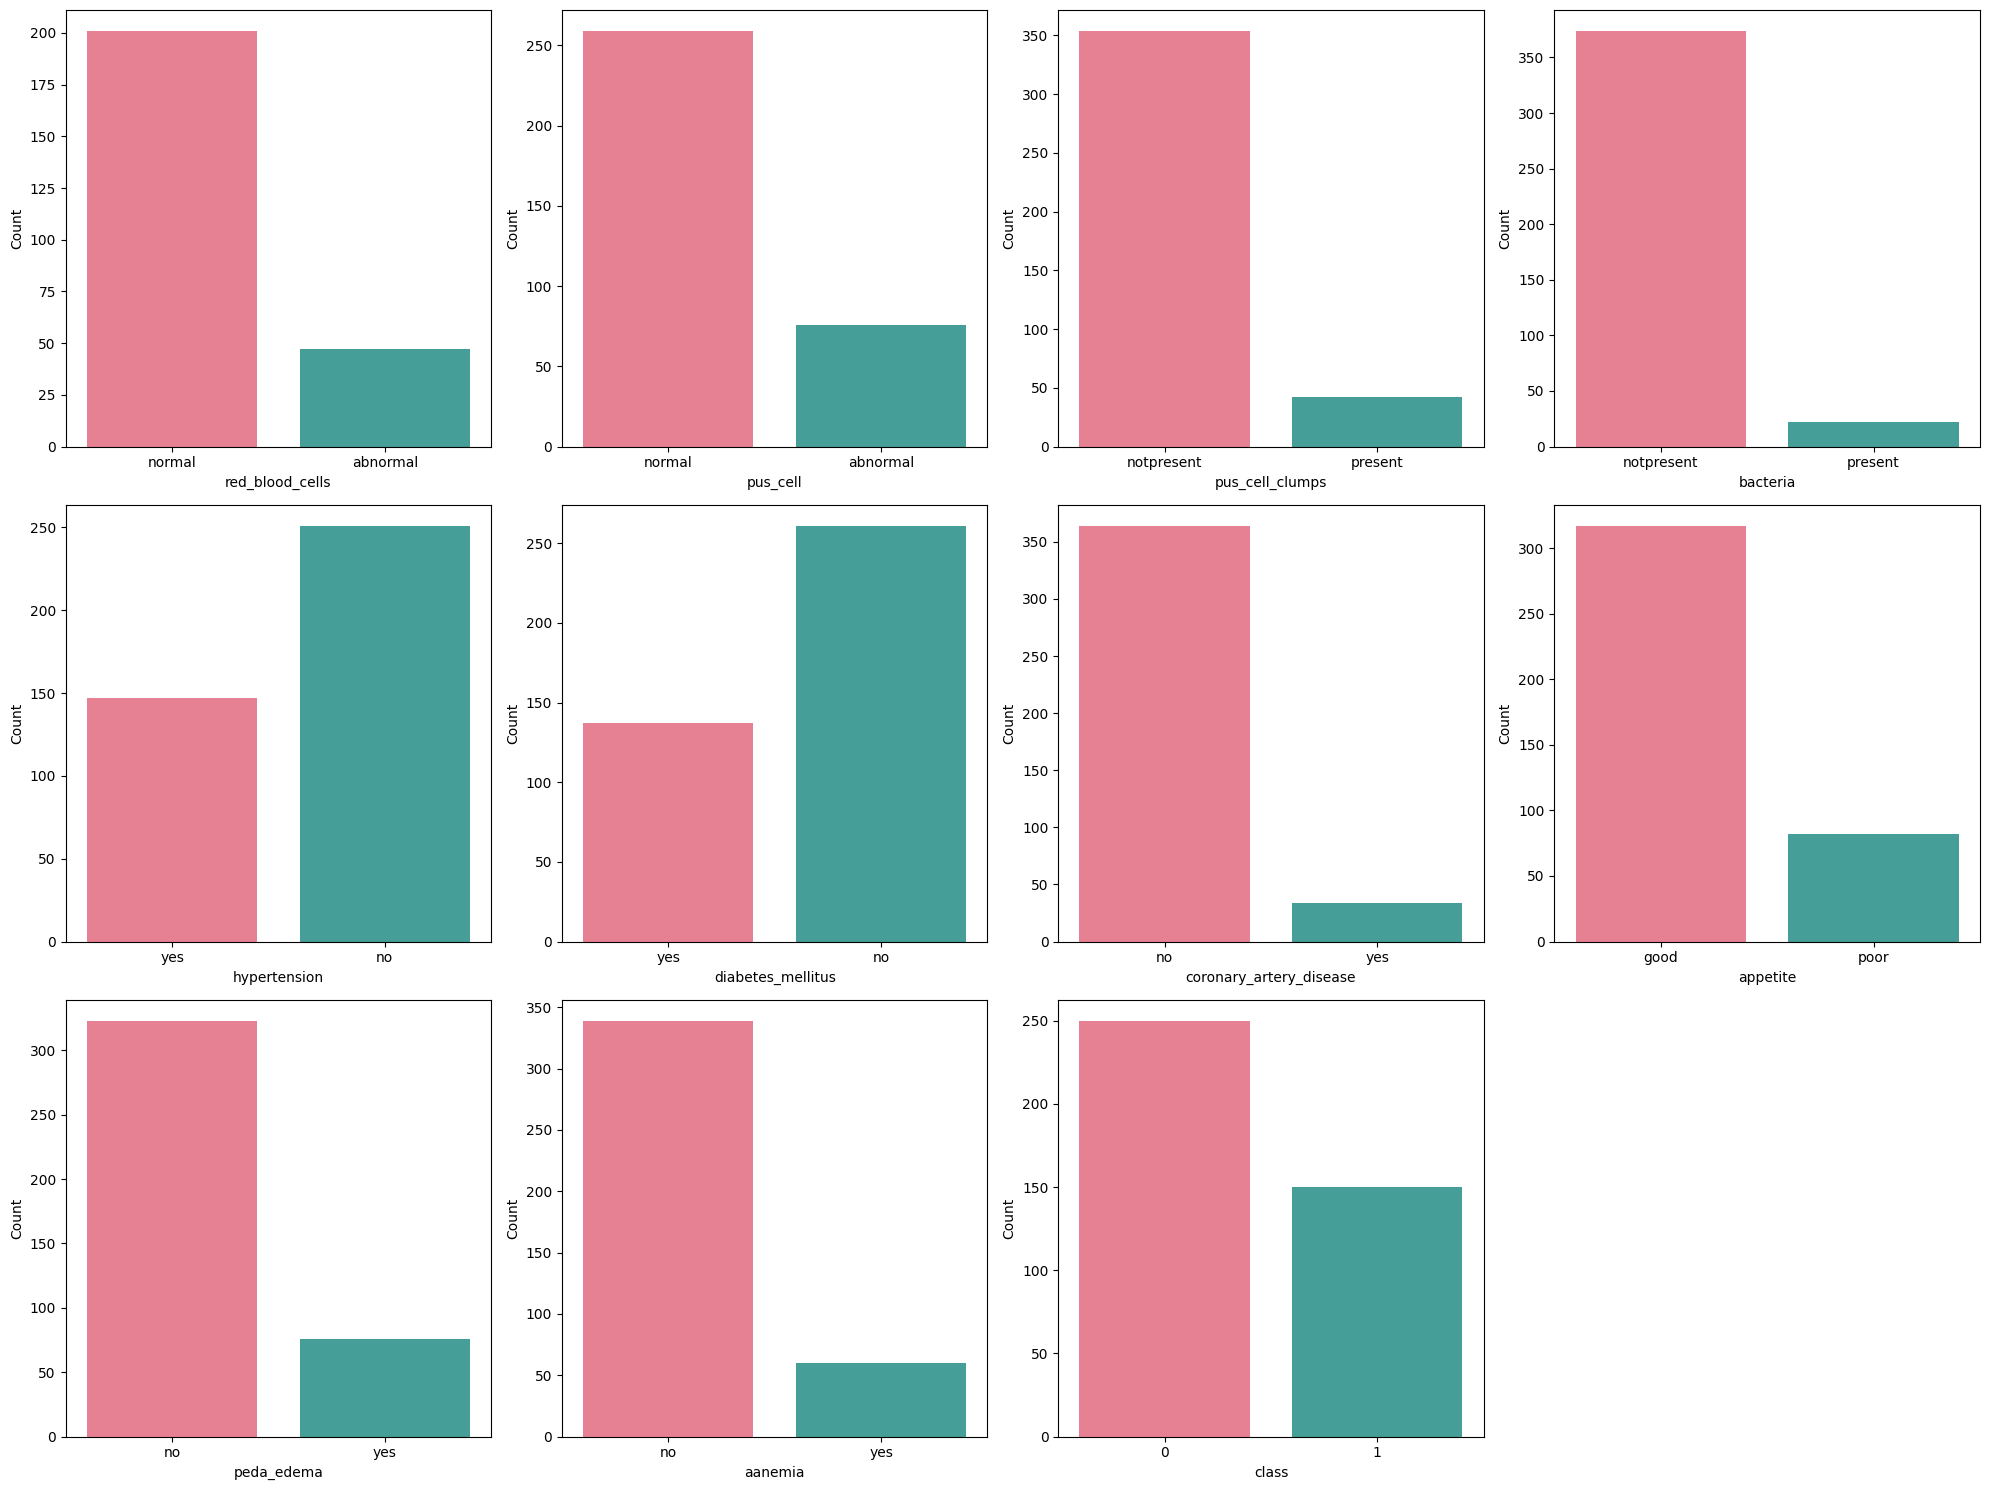

In [22]:
plt.figure(figsize=(20, 15))
for i, column in enumerate(cat_cols, 1):
    plt.subplot(3, 4, i)
    sns.countplot(data=df, x=column, palette='husl')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [23]:
for column in cat_cols:
    print(f"--- {column} ---")
    total_count = len(df[column])
    unique_values = df[column].value_counts()
    for value, count in unique_values.items():
        percentage = (count / total_count) * 100
        print(f"{value}: {percentage:.1f}%")
    print()

--- red_blood_cells ---
normal: 50.2%
abnormal: 11.8%

--- pus_cell ---
normal: 64.8%
abnormal: 19.0%

--- pus_cell_clumps ---
notpresent: 88.5%
present: 10.5%

--- bacteria ---
notpresent: 93.5%
present: 5.5%

--- hypertension ---
no: 62.7%
yes: 36.8%

--- diabetes_mellitus ---
no: 65.2%
yes: 34.2%

--- coronary_artery_disease ---
no: 91.0%
yes: 8.5%

--- appetite ---
good: 79.2%
poor: 20.5%

--- peda_edema ---
no: 80.8%
yes: 19.0%

--- aanemia ---
no: 84.8%
yes: 15.0%

--- class ---
0: 62.5%
1: 37.5%



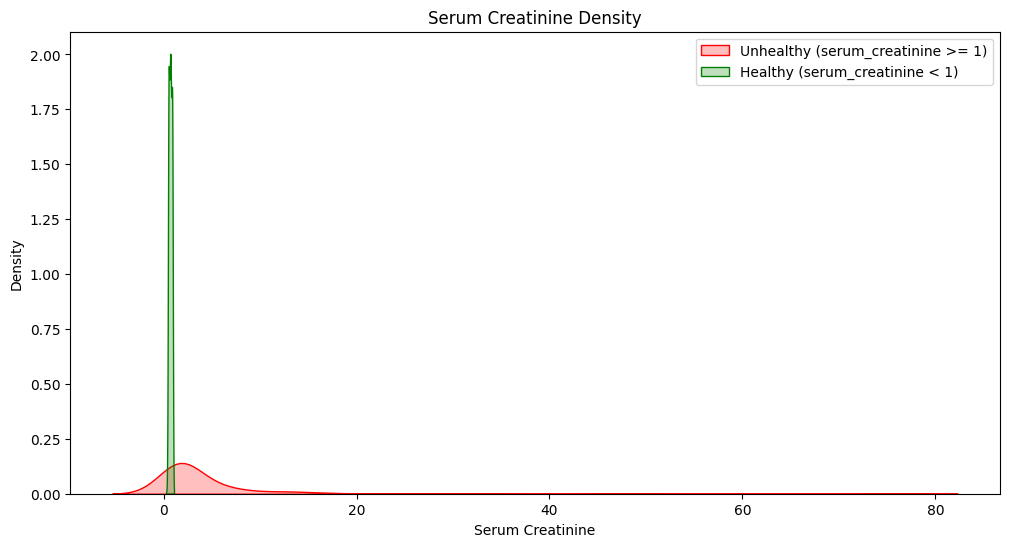

In [24]:
unhealthy = df[df['serum_creatinine'] >= 1]['serum_creatinine']
healthy = df[df['serum_creatinine'] < 1]['serum_creatinine']

plt.figure(figsize = (12,6))
sns.kdeplot(data=unhealthy, color='red', shade=True, label='Unhealthy (serum_creatinine >= 1)')
sns.kdeplot(data=healthy, color='green', shade=True, label='Healthy (serum_creatinine < 1)')

plt.title('Serum Creatinine Density')
plt.xlabel('Serum Creatinine')
plt.ylabel('Density')
plt.legend()
plt.show()

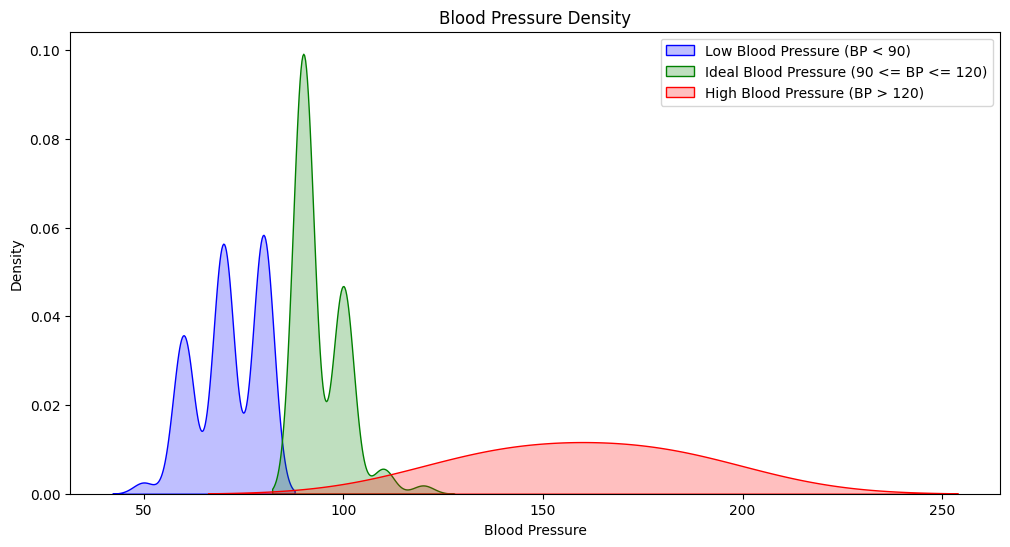

In [25]:
low_bp = df[df['blood_pressure'] < 90]['blood_pressure']
ideal_bp = df[(df['blood_pressure'] >= 90) & (df['blood_pressure'] <= 120)]['blood_pressure']
high_bp = df[df['blood_pressure'] > 120]['blood_pressure']

plt.figure(figsize=(12, 6))
sns.kdeplot(data=low_bp, color='blue', shade=True, label='Low Blood Pressure (BP < 90)')
sns.kdeplot(data=ideal_bp, color='green', shade=True, label='Ideal Blood Pressure (90 <= BP <= 120)')
sns.kdeplot(data=high_bp, color='red', shade=True, label='High Blood Pressure (BP > 120)')

plt.title('Blood Pressure Density')
plt.xlabel('Blood Pressure')
plt.ylabel('Density')
plt.legend()
plt.show()

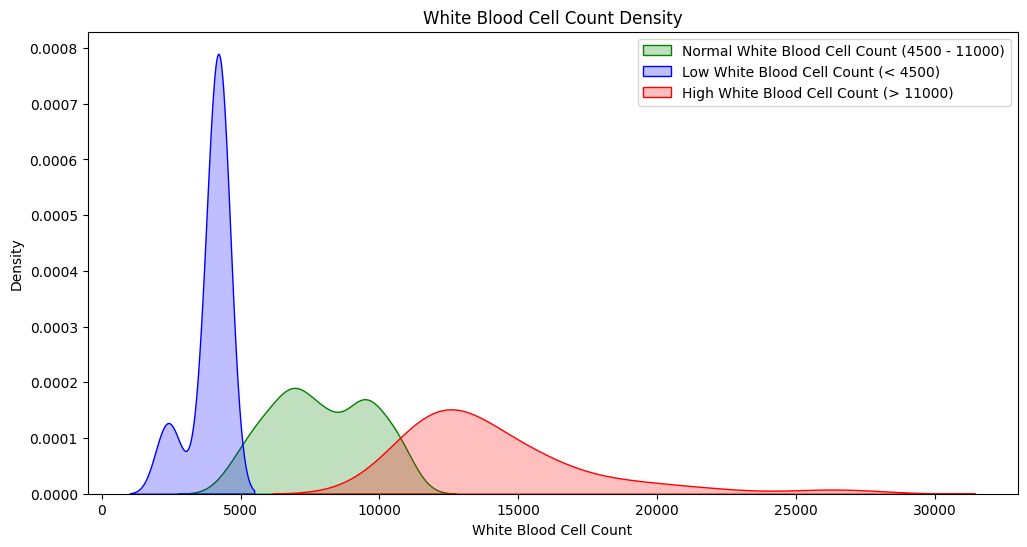

In [26]:
normal_wbc = df[(df['white_blood_cell_count'] >= 4500) & (df['white_blood_cell_count'] <= 11000)]['white_blood_cell_count']
low_wbc = df[df['white_blood_cell_count'] < 4500]['white_blood_cell_count']
high_wbc = df[df['white_blood_cell_count'] > 11000]['white_blood_cell_count']

plt.figure(figsize=(12, 6))
sns.kdeplot(data=normal_wbc, color='green', shade=True, label='Normal White Blood Cell Count (4500 - 11000)')
sns.kdeplot(data=low_wbc, color='blue', shade=True, label='Low White Blood Cell Count (< 4500)')
sns.kdeplot(data=high_wbc, color='red', shade=True, label='High White Blood Cell Count (> 11000)')

plt.title('White Blood Cell Count Density')
plt.xlabel('White Blood Cell Count')
plt.ylabel('Density')
plt.legend()
plt.show()

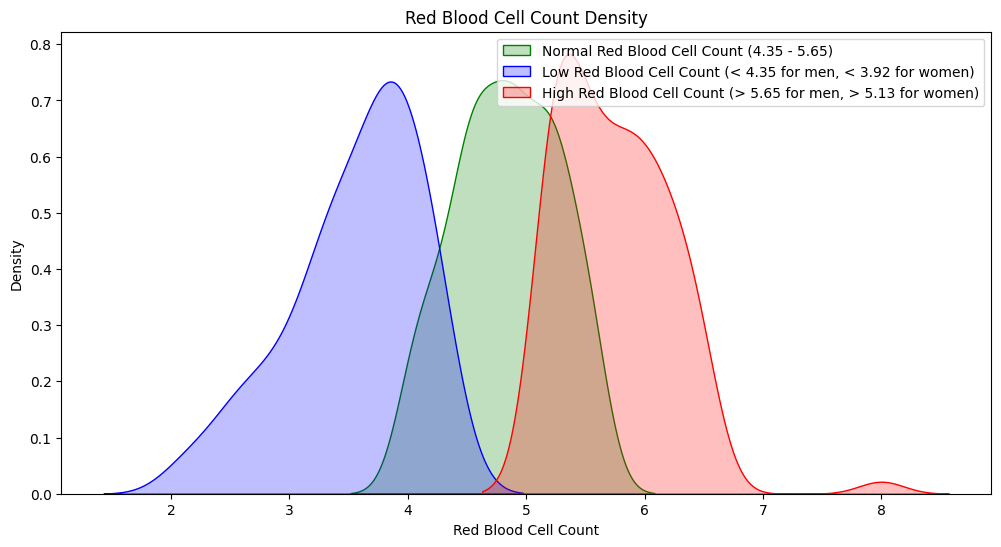

In [27]:
normal_rbc = df[((df['red_blood_cell_count'] >= 4.35) & (df['red_blood_cell_count'] <= 5.65)) | ((df['red_blood_cell_count'] >= 3.92) & (df['red_blood_cell_count'] <= 5.13))]['red_blood_cell_count']
low_rbc = df[(df['red_blood_cell_count'] < 4.35) | (df['red_blood_cell_count'] < 3.92)]['red_blood_cell_count']
high_rbc = df[(df['red_blood_cell_count'] > 5.65) | (df['red_blood_cell_count'] > 5.13)]['red_blood_cell_count']

plt.figure(figsize=(12, 6))
sns.kdeplot(data=normal_rbc, color='green', shade=True, label='Normal Red Blood Cell Count (4.35 - 5.65)')
sns.kdeplot(data=low_rbc, color='blue', shade=True, label='Low Red Blood Cell Count (< 4.35 for men, < 3.92 for women)')
sns.kdeplot(data=high_rbc, color='red', shade=True, label='High Red Blood Cell Count (> 5.65 for men, > 5.13 for women)')

plt.title('Red Blood Cell Count Density')
plt.xlabel('Red Blood Cell Count')
plt.ylabel('Density')
plt.legend()
plt.show()

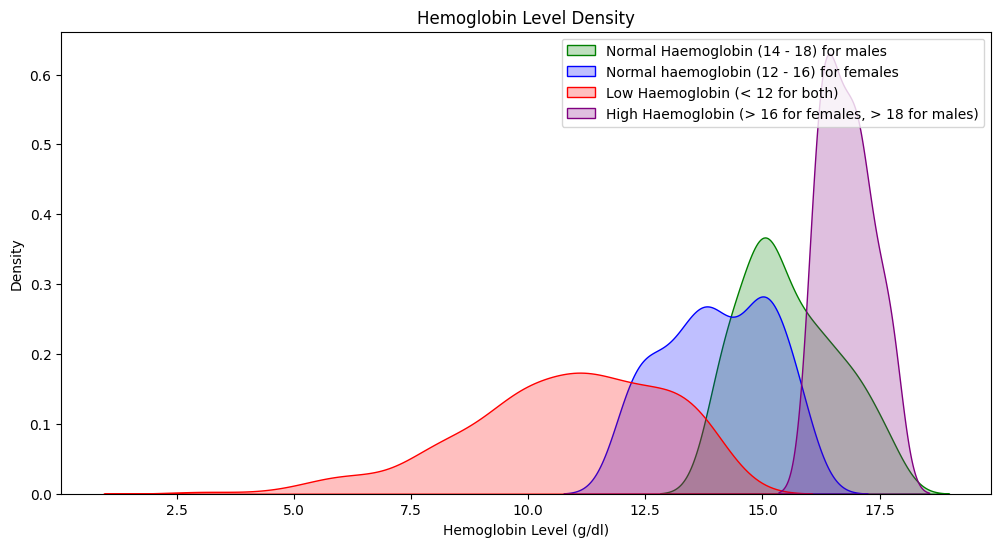

In [28]:
normal_hb_male = df[(df['haemoglobin'] >= 14) & (df['haemoglobin'] <= 18)]['haemoglobin']
normal_hb_female = df[(df['haemoglobin'] >= 12) & (df['haemoglobin'] <= 16)]['haemoglobin']
low_hb = df[(df['haemoglobin'] < 12) | (df['haemoglobin'] < 14)]['haemoglobin']
high_hb = df[(df['haemoglobin'] > 16) | (df['haemoglobin'] > 18)]['haemoglobin']

# KDE grafiğini çizme
plt.figure(figsize=(12, 6))
sns.kdeplot(data=normal_hb_male, color='green', shade=True, label='Normal Haemoglobin (14 - 18) for males')
sns.kdeplot(data=normal_hb_female, color='blue', shade=True, label='Normal haemoglobin (12 - 16) for females')
sns.kdeplot(data=low_hb, color='red', shade=True, label='Low Haemoglobin (< 12 for both)')
sns.kdeplot(data=high_hb, color='purple', shade=True, label='High Haemoglobin (> 16 for females, > 18 for males)')

plt.title('Hemoglobin Level Density')
plt.xlabel('Hemoglobin Level (g/dl)')
plt.ylabel('Density')
plt.legend()
plt.show()

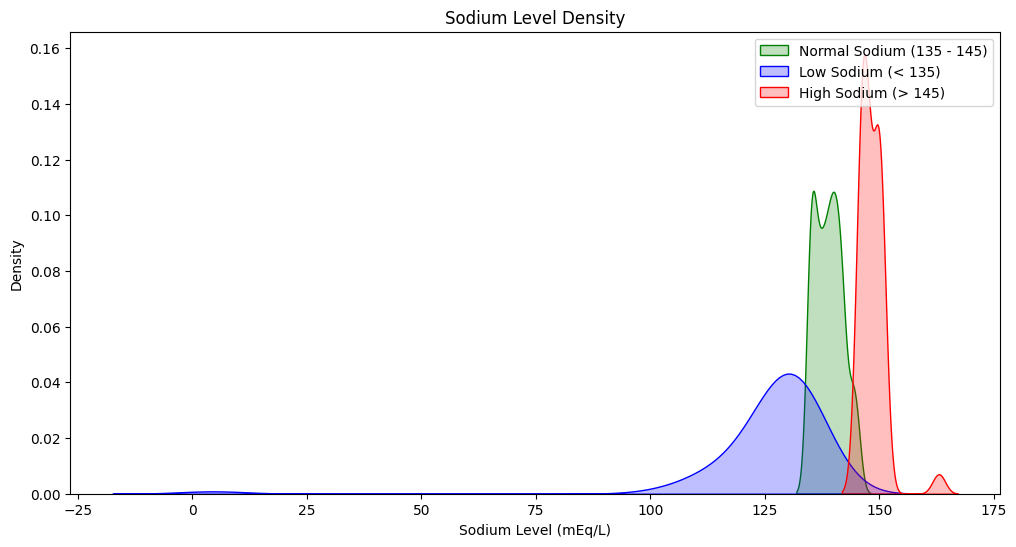

In [29]:
normal_sodium = df[(df['sodium'] >= 135) & (df['sodium'] <= 145)]['sodium']
low_sodium = df[df['sodium'] < 135]['sodium']
high_sodium = df[df['sodium'] > 145]['sodium']

plt.figure(figsize=(12, 6))
sns.kdeplot(data=normal_sodium, color='green', shade=True, label='Normal Sodium (135 - 145)')
sns.kdeplot(data=low_sodium, color='blue', shade=True, label='Low Sodium (< 135)')
sns.kdeplot(data=high_sodium, color='red', shade=True, label='High Sodium (> 145)')

plt.title('Sodium Level Density')
plt.xlabel('Sodium Level (mEq/L)')
plt.ylabel('Density')
plt.legend()
plt.show()

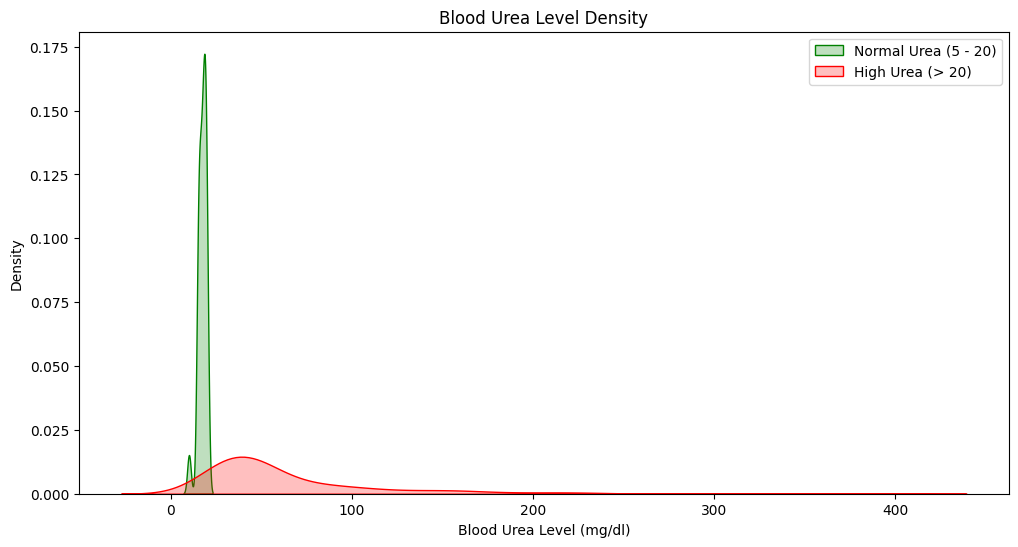

In [30]:
normal_urea = df[(df['blood_urea'] >= 5) & (df['blood_urea'] <= 20)]['blood_urea']
low_urea = df[df['blood_urea'] < 5]['blood_urea']
high_urea = df[df['blood_urea'] > 20]['blood_urea']

plt.figure(figsize=(12, 6))
sns.kdeplot(data=normal_urea, color='green', shade=True, label='Normal Urea (5 - 20)')
sns.kdeplot(data=low_urea, color='blue', shade=True, label='Low Urea (< 5)')
sns.kdeplot(data=high_urea, color='red', shade=True, label='High Urea (> 20)')

plt.title('Blood Urea Level Density')
plt.xlabel('Blood Urea Level (mg/dl)')
plt.ylabel('Density')
plt.legend()
plt.show()

[Text(44.125, 0.5, 'AGE')]

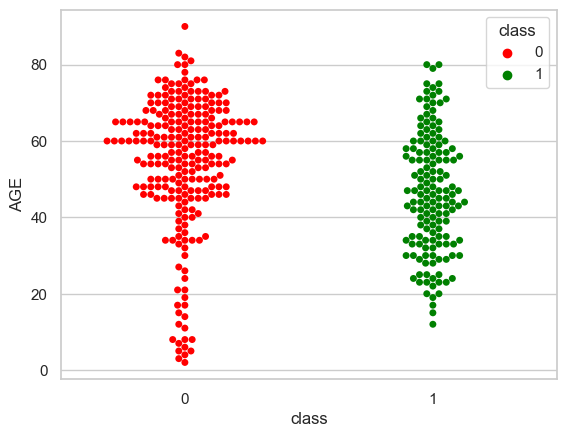

In [31]:
sns.set_theme(style="whitegrid", palette=["red", "green"])

# Draw a categorical scatterplot to show each observation
ax = sns.swarmplot(data=df, x="class", y="age",hue='class')
ax.set(ylabel="AGE")

### Data Preprocessing

In [32]:
df[num_cols].isnull().sum()

age                         9
blood_pressure             12
specific_gravity           47
albumin                    46
sugar                      49
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
sodium                     87
potassium                  88
haemoglobin                52
packed_cell_volume         71
white_blood_cell_count    106
red_blood_cell_count      131
dtype: int64

In [33]:
median_values = df[num_cols].median()
df[num_cols] = df[num_cols].fillna(median_values)

In [34]:
df[num_cols].isnull().sum()

age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [35]:
df[cat_cols].isnull().sum()

red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [36]:
mode_values = df.mode().iloc[0]  # Tüm DataFrame'in mod değerlerini hesapla
df[cat_cols] = df[cat_cols].fillna(mode_values) 

In [37]:
df[cat_cols].isnull().sum()

red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
class                      0
dtype: int64

#### Label Encoder

In [38]:
LabelEncoder = LabelEncoder()

for col in cat_cols:
    df[col] = LabelEncoder.fit_transform(df[col])

In [39]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,36.0,1.2,138.0,4.4,15.4,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,121.0,18.0,0.8,138.0,4.4,11.3,38.0,6000.0,4.8,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,1.8,138.0,4.4,9.6,31.0,7500.0,4.8,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,1.4,138.0,4.4,11.6,35.0,7300.0,4.6,0,0,0,0,0,0,0


### Training model 

In [40]:
y = df['class']
X = df.drop(['class'], axis=1)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [43]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming X_train, X_test, y_train, y_test are properly defined

models = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "MultinomialNB": MultinomialNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "AdaBoost": AdaBoostClassifier(),
}

for model_name, model in models.items():
    try:
        model.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test)

        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        print(f'{model_name} Accuracy: {accuracy:.2f}')
        
        # Generate a classification report
        print(f'{model_name} Classification Report:')
        print(classification_report(y_test, y_pred))

        cm = confusion_matrix(y_test, y_pred)
        print(f'{model_name} Confusion Matrix:')
        print(cm)
        
        print('-' * 55)
    except Exception as e:
        print(f"Error occurred with model '{model_name}': {e}")


Random Forest Accuracy: 1.00
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        28

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

Random Forest Confusion Matrix:
[[52  0]
 [ 0 28]]
-------------------------------------------------------
Error occurred with model 'Logistic Regression': 'str' object has no attribute 'decode'
K-Nearest Neighbors Accuracy: 0.69
K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.60      0.71        52
           1       0.53      0.86      0.66        28

    accuracy                           0.69        80
   macro avg       0.71      0.73      0.69        80
weighted avg       0.76      0.69      0.69        80

K-Neare

In [44]:
from sklearn.externals import joblib

# Assuming X_train, X_test, y_train, y_test are properly defined

models = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "MultinomialNB": MultinomialNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "AdaBoost": AdaBoostClassifier(),
}

for model_name, model in models.items():
    try:
        model.fit(X_train, y_train)
        
        # Save the trained model
        model_filename = f"{model_name}_model.pkl"
        joblib.dump(model, model_filename)

        # Make predictions on the test set
        y_pred = model.predict(X_test)

        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        print(f'{model_name} Accuracy: {accuracy:.2f}')
        
        # Load the saved model
        loaded_model = joblib.load(model_filename)

        # Evaluate the loaded model (optional)
        loaded_model_accuracy = accuracy_score(y_test, loaded_model.predict(X_test))
        print(f'{model_name} Loaded Model Accuracy: {loaded_model_accuracy:.2f}')
        
        print('-' * 55)
    except Exception as e:
        print(f"Error occurred with model '{model_name}': {e}")


Random Forest Accuracy: 1.00
Random Forest Loaded Model Accuracy: 1.00
-------------------------------------------------------
Error occurred with model 'Logistic Regression': 'str' object has no attribute 'decode'
K-Nearest Neighbors Accuracy: 0.69
K-Nearest Neighbors Loaded Model Accuracy: 0.69
-------------------------------------------------------
MultinomialNB Accuracy: 0.88
MultinomialNB Loaded Model Accuracy: 0.88
-------------------------------------------------------
Decision Tree Accuracy: 0.99
Decision Tree Loaded Model Accuracy: 0.99
-------------------------------------------------------
AdaBoost Accuracy: 1.00
AdaBoost Loaded Model Accuracy: 1.00
-------------------------------------------------------


- Random Forest Accuracy: 1.0
- Logistic Regression Accuracy: 0.91
- K-Nearest Neighbors Accuracy: 0.69
- MultinomialNB Accuracy: 0.88
- Decision Tree Accuracy: 0,99
- AdaBoost Accuracy: 1.00

### Logistic Regression

In [48]:
import numpy as np

# Define the new data point
new_data_point = [48, 80, 1.02, 1, 0, 0, 0, 1, 0, 121, 36, 1.2,nan,nan, 15.4, 44, 7800, 5.2, 1, 1, 0, 1, 0, 0]

# Preprocess the new data point (you need to preprocess it according to how X_train was preprocessed)
# For example, you might need to scale the features or encode categorical variables

# Reshape the data point to match the input shape of the model
new_data_point = np.array(new_data_point).reshape(1, -1)

# Load the saved models
for model_name in models.keys():
    model_filename = f"{model_name}_model.pkl"
    loaded_model = joblib.load(model_filename)

    # Make prediction using the loaded model
    prediction = loaded_model.predict(new_data_point)
    print(f'{model_name} Prediction: {"CKD" if prediction[0] == 1 else "Not CKD"}')


NameError: name 'nan' is not defined

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

In [ ]:
y_pred_lr = lr.predict(X_test)

In [ ]:
print('Accuracy','%.3f' % accuracy_score(y_test, y_pred_lr))
print('Precision','%.3f' % precision_score(y_test, y_pred_lr))
print('Recall','%.3f' % recall_score(y_test, y_pred_lr))
print('F1 Score','%.3f' % f1_score(y_test, y_pred_lr))

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
lr = LogisticRegression()

In [ ]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}


In [ ]:
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# En iyi hiperparametreleri ve doğruluk skorunu yazdırma
print("Best Params:", grid_search.best_params_)
print("Best accuracy score:", grid_search.best_score_)

In [ ]:
lr_best = LogisticRegression(C=1)
lr_best.fit(X_train, y_train)

In [ ]:
y_pred_lr_best = lr_best.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_lr_best)
print("Test Accuracy Score:", accuracy)

### Multinomial Naive Bayes

In [ ]:
data = fetch_20newsgroups(subset='all', shuffle=True, random_state=42)

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(data.data)
y = data.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

In [ ]:
y_pred_mnb = nb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_mnb)
print("Test Accuracy Score:", accuracy)

- Logistic Regression Accuracy: 1.0
- Multinomial Naive Bayes Accuracy: 0.845